In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

Import data on this line. This line will also index the dates when importing properly.

In [3]:
df = pd.read_csv('C:/Users/dhruv/Documents/School/Time Series/code/varData.csv', index_col='dates', parse_dates=True)

In [9]:
# extract the two variables from the dataframe
X = df.iloc[:, 0] # the first variable (in column 0)
y = df.iloc[:, 1] # the second variable (in column 1)

# add a constant term to the input variables
X = sm.add_constant(X)

# create a linear regression model and fit the data
model = sm.OLS(y, X).fit()

# print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             realpcedur   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     44.45
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.12e-09
Time:                        11:23:16   Log-Likelihood:                -487.46
No. Observations:                  91   AIC:                             978.9
Df Residuals:                      89   BIC:                             983.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         482.1408     20.090     24.000      

We have 33% correlation with only one variable in our model so we might find something interesting in our VAR model.

In [12]:
# Need to test for unit root again in the overall gross data
models = ['n', 'c', 'ct']
results = []
for model in models:
    result = adfuller(df['realOverall'], regression=model, autolag='AIC', maxlag=10)
    results.append([model, result[0], result[1], result[4]['5%']])

# Print results in a table
results.append([model, result[0], result[1], result[4]['5%']])

# Print results in a table
headers = ['Model', 'ADF Statistic','p-value','5% Critical Value']
print(tabulate(results[:-1], headers=headers))

Model      ADF Statistic    p-value    5% Critical Value
-------  ---------------  ---------  -------------------
n              -0.527549  0.484767              -1.94457
c              -3.16567   0.0220601             -2.89578
ct             -3.19011   0.0863902             -3.46283


We are going to have to first difference the overall gross data since right now it is non-stationary. Now we just have to check the durable goods data.

In [18]:
models = ['n', 'c', 'ct']
results = []
for model in models:
    result = adfuller(df['realpcedur'], regression=model, autolag='AIC', maxlag=10)
    results.append([model, result[0], result[1], result[4]['5%']])

# Print results in a table
results.append([model, result[0], result[1], result[4]['5%']])

# Print results in a table
headers = ['Model', 'ADF Statistic','p-value','5% Critical Value']
print(tabulate(results[:-1], headers=headers))

Model      ADF Statistic    p-value    5% Critical Value
-------  ---------------  ---------  -------------------
n               0.893483   0.900311             -1.94453
c              -1.6869     0.437875             -2.89538
ct             -2.28641    0.441482             -3.46222


These values are also nonstationary so we have to first difference these variables.

Model      ADF Statistic     p-value    5% Critical Value
-------  ---------------  ----------  -------------------
n               -2.92026  0.00343404             -1.94453
c               -3.10383  0.0262712              -2.89578
ct              -3.11061  0.103729               -3.46283


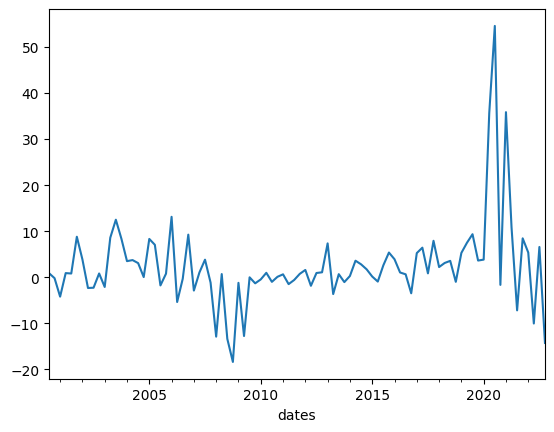

In [21]:
# First differencing the two variables 
# Then we run the two tests again. Will be doing the test for pce first.
stationary = df.diff().dropna()
stationary['realpcedur'].plot()
models = ['n', 'c', 'ct']
results = []
for model in models:
    result = adfuller(stationary['realpcedur'], regression=model, autolag='AIC', maxlag=10)
    results.append([model, result[0], result[1], result[4]['5%']])

# Print results in a table
headers = ['Model', 'ADF Statistic', 'p-value', '5% Critical Value']
print(tabulate(results, headers=headers))

In [22]:
models = ['n', 'c', 'ct']
results = []
for model in models:
    result = adfuller(stationary['realOverall'], regression=model, autolag='AIC', maxlag=10)
    results.append([model, result[0], result[1], result[4]['5%']])

# Print results in a table
headers = ['Model', 'ADF Statistic', 'p-value', '5% Critical Value']
print(tabulate(results, headers=headers))

Model      ADF Statistic      p-value    5% Critical Value
-------  ---------------  -----------  -------------------
n               -4.93823  1.39508e-06             -1.94457
c               -4.90646  3.38782e-05             -2.89619
ct              -4.97069  0.000232574             -3.4676


Now we know that both of the variables are stationary after the first difference.